# Setup

In [1]:
# Downloading packages
! pip install numpy 
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install -q Kaggle
! pip install shap

     -------------------------------------- 435.6/435.6 kB 9.0 MB/s eta 0:00:00


# Data Preprocessing

In [4]:
# Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [5]:
# Reading the dataset
df = pd.read_csv('Airbnb_European.csv')

# Droping index columns in dataset
df.drop(df.columns[0], axis=1, inplace=True)

# Reindex the dataframe
df = df.reindex(columns=['country','day','room_type','room_shared','room_private','person_capacity','host_is_superhost','multi','biz','cleanliness_rating','guest_satisfaction_overall','bedrooms','dist','metro_dist','attr_index','attr_index_norm','rest_index','rest_index_norm','lng','lat','realSum'])
df

,country,day,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,realSum
0,rome,weekdays,Private room,False,True,2.0,True,1,0,10.0,...,1,2.978468,1.595733,281.163932,6.230648,697.727246,15.191486,12.48654,41.92498,156.874664
1,rome,weekdays,Private room,False,True,2.0,False,1,0,9.0,...,1,0.935371,0.649269,482.707193,10.696887,1251.524333,27.249208,12.49627,41.90801,172.772543
2,rome,weekdays,Entire home/apt,False,False,4.0,False,0,1,9.0,...,1,2.203025,0.494697,691.708998,15.328408,1625.897266,35.400361,12.47700,41.90700,277.745307
3,rome,weekdays,Entire home/apt,False,False,6.0,False,1,0,9.0,...,2,2.703010,1.295153,805.592641,17.852092,2035.819533,44.325522,12.46969,41.90019,444.906834
4,rome,weekdays,Private room,False,True,3.0,False,1,0,9.0,...,1,1.295968,0.867455,317.076369,7.026475,836.622814,18.215634,12.51544,41.89463,131.391298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,vienna,weekends,Entire home/apt,False,False,6.0,False,0,1,10.0,...,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,715.938574
51703,vienna,weekends,Entire home/apt,False,False,2.0,False,0,0,8.0,...,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,304.793960
51704,vienna,weekends,Entire home/apt,False,False,2.0,False,0,0,10.0,...,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,637.168969
51705,vienna,weekends,Private room,False,True,2.0,False,0,0,10.0,...,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,301.054157


In [6]:
counts = df.groupby(['country', 'day']).size().reset_index(name='count')
counts

,country,day,count
0,amsterdam,weekdays,1103
1,amsterdam,weekends,977
2,athens,weekdays,2653
3,athens,weekends,2627
4,barcelona,weekdays,1555
5,barcelona,weekends,1278
6,berlin,weekdays,1284
7,berlin,weekends,1200
8,budapest,weekdays,2074
9,budapest,weekends,1948


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'rome'),
  Text(1, 0, 'amsterdam'),
  Text(2, 0, 'lisbon'),
  Text(3, 0, 'berlin'),
  Text(4, 0, 'vienna'),
  Text(5, 0, 'barcelona'),
  Text(6, 0, 'athens'),
  Text(7, 0, 'paris'),
  Text(8, 0, 'london'),
  Text(9, 0, 'budapest')])

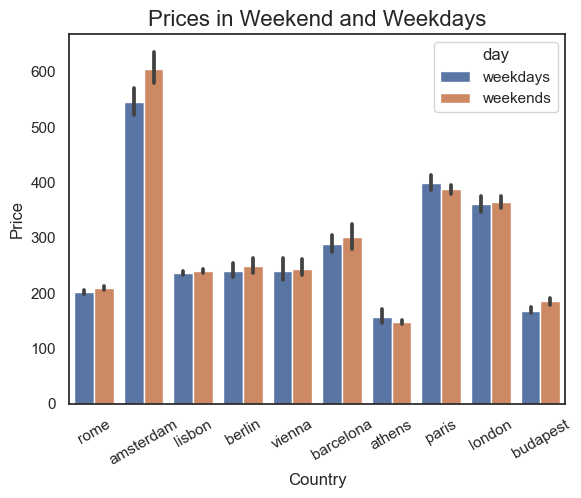

In [7]:
# Analysing the prices in the dataset
sns.set(style='white')
sns.barplot(x='country', y='realSum', hue='day', data=df) 

plt.title('Prices in Weekend and Weekdays', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Price')
plt.xticks(rotation=30)

Text(0, 0.5, 'No of rooms')

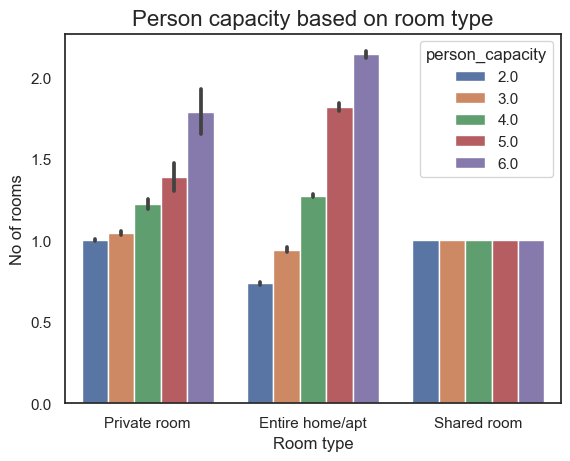

In [8]:
# Analysing the person capacity based on room type
sns.set(style='white')
sns.barplot(x='room_type', y='bedrooms', hue='person_capacity', data=df) 

plt.title('Person capacity based on room type', fontsize=16)
plt.xlabel('Room type')
plt.ylabel('No of rooms')

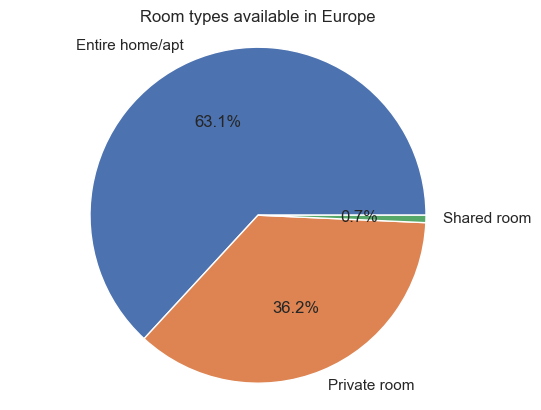

In [9]:
# Analysing type of accomodations prefered in Europe
count = df['room_type'].value_counts()
plt.pie(count.values, labels=count.index, autopct='%1.1f%%')
plt.title('Room types available in Europe')
plt.axis('equal')
plt.show()

C:\Users\mvsak\AppData\Local\Temp\ipykernel_14728\3956773081.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


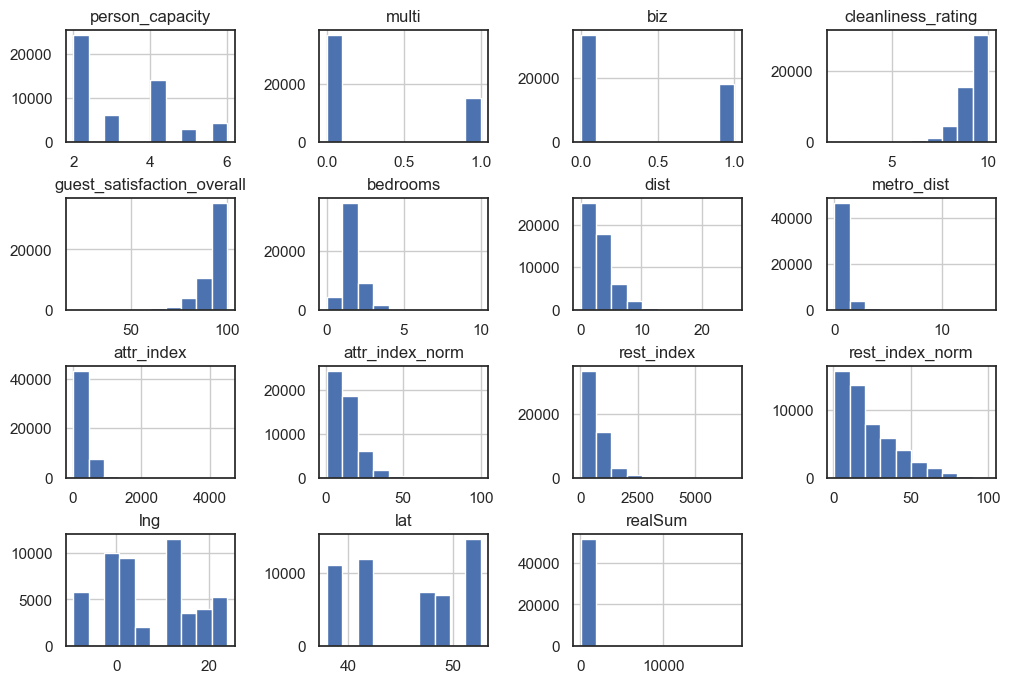

In [10]:
# barplots of the dataframe
fig, ax = plt.subplots(figsize=(12, 8))
df.hist(ax=ax)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [11]:
df.shape

(51707, 21)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     51707 non-null  object 
 1   day                         51707 non-null  object 
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

In [13]:
# Checking missing values
df.isnull().sum()

country                       0
day                           0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
realSum                       0
dtype: int64

In [14]:
df.describe()

,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,realSum
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128,279.879591
std,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263,327.948386
min,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000,34.779339
25%,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510,148.752174
50%,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690,211.343089
75%,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885,319.694287
max,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410,18545.450285


In [15]:
# One Hot Encoding 
room_type_encoded = pd.get_dummies(df['room_type'], prefix='room_type')
df.drop('room_type', axis=1, inplace=True)
df = pd.concat([df, room_type_encoded], axis=1)
df = df.reindex(columns=['country','day','room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'room_shared','room_private','person_capacity','host_is_superhost','multi','biz','cleanliness_rating','guest_satisfaction_overall','bedrooms','dist','metro_dist','attr_index','attr_index_norm','rest_index','rest_index_norm','lng','lat','realSum'])
df

,country,day,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_shared,room_private,person_capacity,host_is_superhost,multi,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,realSum
0,rome,weekdays,0,1,0,False,True,2.0,True,1,...,1,2.978468,1.595733,281.163932,6.230648,697.727246,15.191486,12.48654,41.92498,156.874664
1,rome,weekdays,0,1,0,False,True,2.0,False,1,...,1,0.935371,0.649269,482.707193,10.696887,1251.524333,27.249208,12.49627,41.90801,172.772543
2,rome,weekdays,1,0,0,False,False,4.0,False,0,...,1,2.203025,0.494697,691.708998,15.328408,1625.897266,35.400361,12.47700,41.90700,277.745307
3,rome,weekdays,1,0,0,False,False,6.0,False,1,...,2,2.703010,1.295153,805.592641,17.852092,2035.819533,44.325522,12.46969,41.90019,444.906834
4,rome,weekdays,0,1,0,False,True,3.0,False,1,...,1,1.295968,0.867455,317.076369,7.026475,836.622814,18.215634,12.51544,41.89463,131.391298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,vienna,weekends,1,0,0,False,False,6.0,False,0,...,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,715.938574
51703,vienna,weekends,1,0,0,False,False,2.0,False,0,...,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,304.793960
51704,vienna,weekends,1,0,0,False,False,2.0,False,0,...,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,637.168969
51705,vienna,weekends,0,1,0,False,True,2.0,False,0,...,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,301.054157


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     51707 non-null  object 
 1   day                         51707 non-null  object 
 2   room_type_Entire home/apt   51707 non-null  uint8  
 3   room_type_Private room      51707 non-null  uint8  
 4   room_type_Shared room       51707 non-null  uint8  
 5   room_shared                 51707 non-null  bool   
 6   room_private                51707 non-null  bool   
 7   person_capacity             51707 non-null  float64
 8   host_is_superhost           51707 non-null  bool   
 9   multi                       51707 non-null  int64  
 10  biz                         51707 non-null  int64  
 11  cleanliness_rating          51707 non-null  float64
 12  guest_satisfaction_overall  51707 non-null  float64
 13  bedrooms                    517

In [17]:
# Converting the datatypes in the dataframe

df['room_shared'] = df['room_shared'].astype('int')
df['room_private'] = df['room_private'].astype('int')
df['person_capacity'] = df['person_capacity'].astype('int')
df['host_is_superhost'] = df['host_is_superhost'].astype('int')
df['room_type_Entire home/apt'] = df['room_type_Entire home/apt'].astype('int')
df['room_type_Private room'] = df['room_type_Private room'].astype('int')
df['room_type_Shared room'] = df['room_type_Shared room'].astype('int')

In [18]:
# Preprocessing package label encoder
from sklearn.preprocessing import LabelEncoder

# Label encoder
label_encoder = LabelEncoder()
df['country'] = label_encoder.fit_transform(df['country'])
df['day'] = label_encoder.fit_transform(df['day'])
print(df.loc[:, ['country', 'day']])

       country  day
0            8    0
1            8    0
2            8    0
3            8    0
4            8    0
...        ...  ...
51702        9    1
51703        9    1
51704        9    1
51705        9    1
51706        9    1

[51707 rows x 2 columns]


In [19]:
df

,country,day,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_shared,room_private,person_capacity,host_is_superhost,multi,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,realSum
0,8,0,0,1,0,0,1,2,1,1,...,1,2.978468,1.595733,281.163932,6.230648,697.727246,15.191486,12.48654,41.92498,156.874664
1,8,0,0,1,0,0,1,2,0,1,...,1,0.935371,0.649269,482.707193,10.696887,1251.524333,27.249208,12.49627,41.90801,172.772543
2,8,0,1,0,0,0,0,4,0,0,...,1,2.203025,0.494697,691.708998,15.328408,1625.897266,35.400361,12.47700,41.90700,277.745307
3,8,0,1,0,0,0,0,6,0,1,...,2,2.703010,1.295153,805.592641,17.852092,2035.819533,44.325522,12.46969,41.90019,444.906834
4,8,0,0,1,0,0,1,3,0,1,...,1,1.295968,0.867455,317.076369,7.026475,836.622814,18.215634,12.51544,41.89463,131.391298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,9,1,1,0,0,0,0,6,0,0,...,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,715.938574
51703,9,1,1,0,0,0,0,2,0,0,...,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,304.793960
51704,9,1,1,0,0,0,0,2,0,0,...,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,637.168969
51705,9,1,0,1,0,0,1,2,0,0,...,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,301.054157


In [20]:
# Train Test Split the dataset
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=12) 

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (36194, 22) (36194,)
Test set: (15513, 22) (15513,)


In [21]:
x_train_df = pd.DataFrame(X_train, columns=['country','day','room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'room_shared','room_private','person_capacity','host_is_superhost','multi','biz','cleanliness_rating','guest_satisfaction_overall','bedrooms','dist','metro_dist','attr_index','attr_index_norm','rest_index','rest_index_norm','lng','lat'])
column_names = x_train_df.columns.tolist()

In [22]:
# Preprocess pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

preprocess = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

# Feature Importance 

In [ ]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor(n_estimators = 100)

PIPE = Pipeline([('preprocess', preprocess), ('model', model_rfr)])
PIPE.fit(X_train, y_train)

data = []
for feature in zip(df.columns, PIPE['model'].feature_importances_):
  temp = list(feature).copy()
  data.append(temp)

feature_Imp_rfr = pd.DataFrame(data, columns = ['Feature', 'Score'])
feature_rfr_sorted = feature_Imp_rfr.sort_values('Score', ascending=False)
feature_rfr_sorted.head()

,Feature,Score
7,person_capacity,0.150569
4,room_type_Shared room,0.115671
0,country,0.085856
1,day,0.062478
14,dist,0.060369


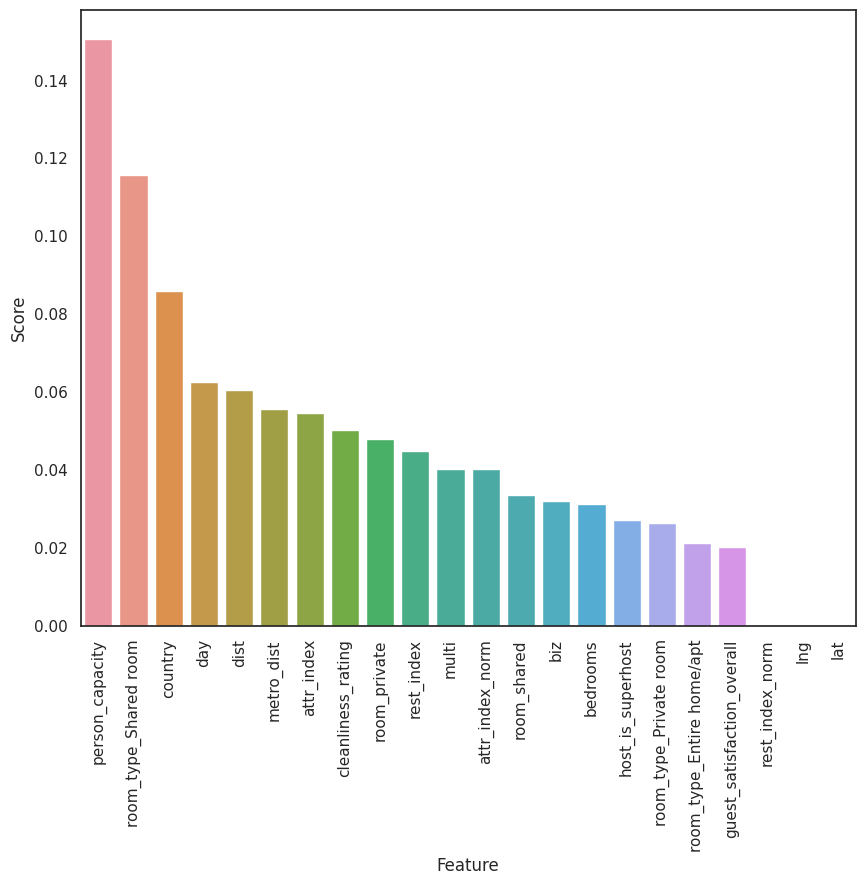

In [ ]:
# Visualising the important features based on ranking
plt.figure(figsize=(10, 8))
ax = sns.barplot(x = 'Feature', y = 'Score', data = feature_rfr_sorted)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [ ]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor(n_estimators = 100)

PIPE = Pipeline([('preprocess', preprocess), ('model', model_gbr)])
PIPE.fit(X_train, y_train)

data = []
for feature in zip(df.columns, PIPE['model'].feature_importances_):
  temp = list(feature).copy()
  data.append(temp)

feature_Imp_gbr = pd.DataFrame(data, columns = ['Feature', 'Score'])
feature_gbr_sorted = feature_Imp_gbr.sort_values('Score', ascending=False)
feature_gbr_sorted.head()

,Feature,Score
7,person_capacity,0.221736
4,room_type_Shared room,0.186199
0,country,0.132094
11,cleanliness_rating,0.068392
6,room_private,0.052865


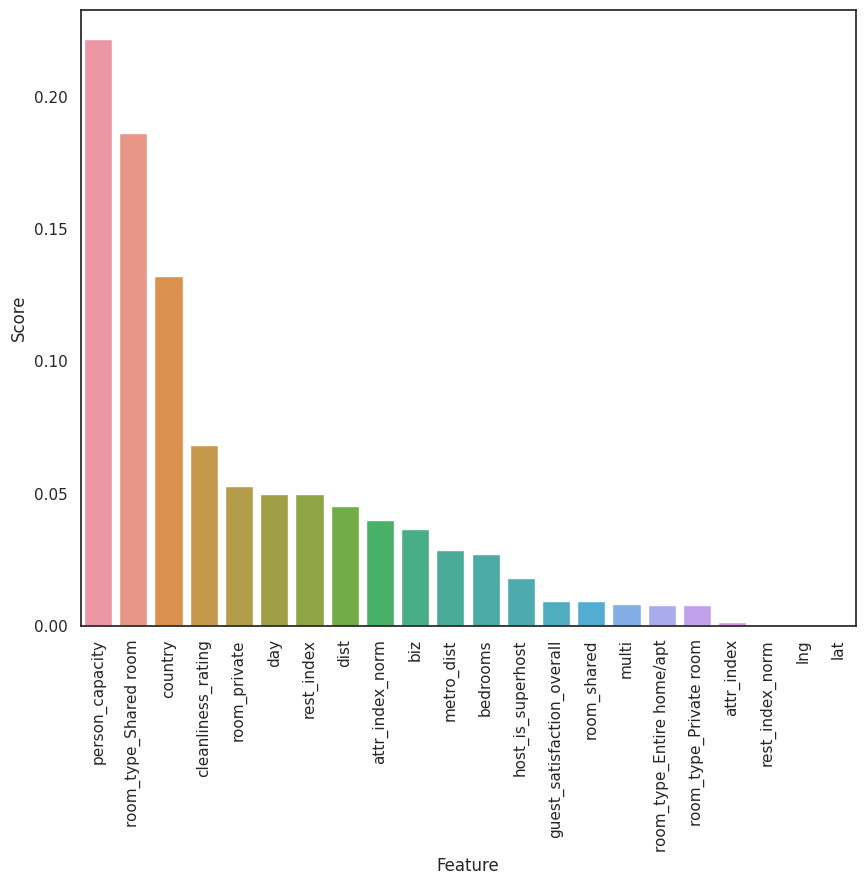

In [ ]:
# Visualising the important features based on ranking
plt.figure(figsize=(10, 8))
ax = sns.barplot(x = 'Feature', y = 'Score', data = feature_gbr_sorted)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [ ]:
# Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor(max_depth=5)

PIPE = Pipeline([('preprocess', preprocess), ('model', model_dtr)])
PIPE.fit(X_train, y_train)

data = []
for feature in zip(df.columns, PIPE['model'].feature_importances_):
  temp = list(feature).copy()
  data.append(temp)

feature_Imp_dtr = pd.DataFrame(data, columns = ['Feature', 'Score'])
feature_dtr_sorted = feature_Imp_dtr.sort_values('Score', ascending=False)
feature_dtr_sorted.head()

,Feature,Score
7,person_capacity,0.256991
0,country,0.211425
4,room_type_Shared room,0.194988
16,attr_index,0.115946
14,dist,0.058411


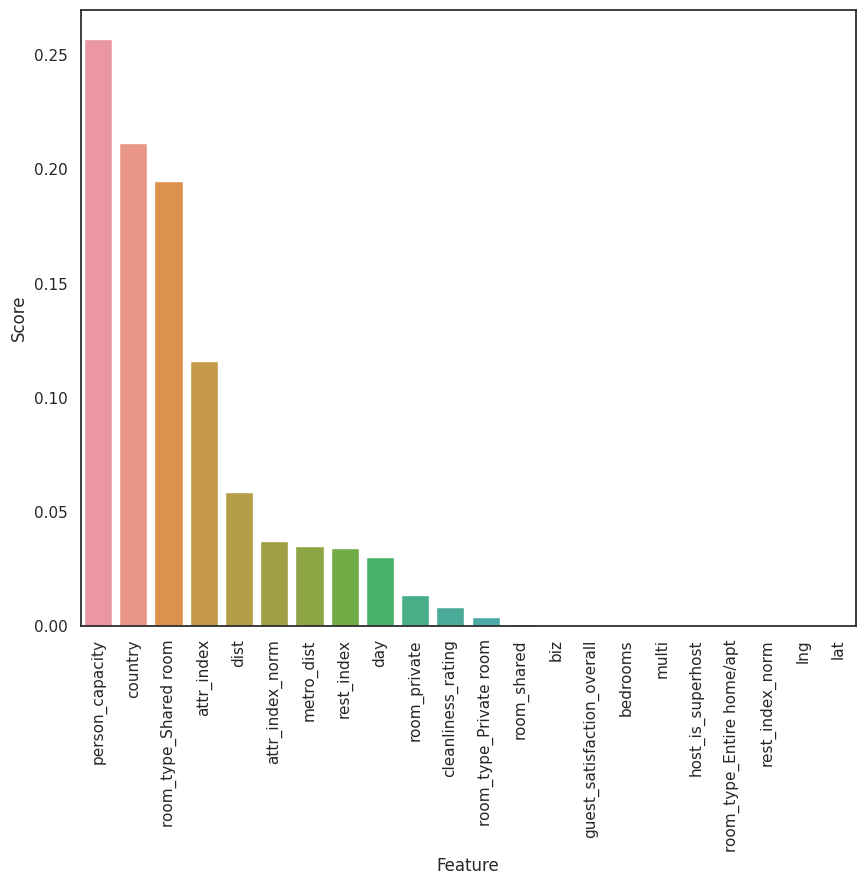

In [ ]:
# Visualising the important features based on ranking
plt.figure(figsize=(10, 8))
ax = sns.barplot(x = 'Feature', y = 'Score', data = feature_dtr_sorted)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

# Select from model

In [ ]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

model_rfr = RandomForestRegressor(n_estimators = 100)
select_model = SelectFromModel(model_rfr, max_features=5)

PIPE = Pipeline([('preprocess', preprocess), ('sfm_rfr', select_model ), ('model', model_rfr)])
PIPE.fit(X_train, y_train)

for feature in PIPE['sfm_rfr'].get_support(indices = True):
    print(df.columns[feature])

country
day
room_type_Shared room
person_capacity
dist


In [ ]:
import shap
explainer = shap.TreeExplainer(PIPE.named_steps['model'])

# Generate shap val
X_test_transformed = PIPE.named_steps['preprocess'].transform(X_test)
shap_values = explainer(X_test_transformed)

feature_names = PIPE.named_steps['preprocess'].get_feature_names_out()
print("Feature names:", feature_names)

# Visualize feature importance using a summary plot
shap.summary_plot(shap_values, X_test_transformed, plot_type="bar", feature_names=feature_names)

In [ ]:
# Gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel

model_gbr = GradientBoostingRegressor(n_estimators = 100)
select_model_gbr = SelectFromModel(model_gbr, max_features=5)

PIPE = Pipeline([('preprocess', preprocess), ('sfm_gbr', select_model_gbr ), ('model', model_gbr)])
PIPE.fit(X_train, y_train)

for feature in PIPE['sfm_gbr'].get_support(indices = True):
    print(df.columns[feature])

country
room_type_Shared room
room_private
person_capacity
cleanliness_rating


In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel

model_dtr = DecisionTreeRegressor(max_depth=5)
select_model_gbr = SelectFromModel(model_dtr, max_features=5)

PIPE = Pipeline([('preprocess', preprocess), ('sfm_dtr', select_model_gbr ), ('model', model_dtr)])
PIPE.fit(X_train, y_train)

for feature in PIPE['sfm_dtr'].get_support(indices = True):
    print(df.columns[feature])

country
room_type_Shared room
person_capacity
dist
attr_index


# Ml algorithmns on selected features

In [ ]:
# Creatiga dataframe based on the important features

selected_df = df[['country', 'person_capacity', 'room_type_Shared room', 'dist', 'day', 'cleanliness_rating', 'room_private', 'attr_index', 'realSum']]
selected_df.head()

,country,person_capacity,room_type_Shared room,dist,day,cleanliness_rating,room_private,attr_index,realSum
0,7,2,0,0.699821,0,10.0,1,518.478947,296.159940
1,7,2,0,2.100005,0,10.0,1,873.216962,288.237487
2,7,2,0,3.302325,0,10.0,1,444.556077,211.343089
3,7,2,0,0.547567,0,9.0,0,542.142014,298.956100
4,7,4,0,1.197921,0,7.0,0,406.928958,247.926181


In [ ]:
# Train Test Split the dataset 70-15-15
from sklearn.model_selection import train_test_split

X = selected_df.iloc[:, :-1].values
y = selected_df.iloc[:, -1].values
X_train, X_rest, y_train, y_rest  = train_test_split(X, y, test_size=0.3, random_state=12) 
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=12 )

print ('Train set:', X_train.shape, y_train.shape)
print ('Validation:', X_val.shape, y_val.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (36194, 8) (36194,)
Validation: (7756, 8) (7756,)
Test set: (7757, 8) (7757,)


In [ ]:
# Import Evaluation metrics and validation pakages
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=100, random_state=42)
RFR.fit(X_train, y_train)

print('--- Random Forest Regressor ---')

# Model prediction on validation set
ypred_val = RFR.predict(X_val)
print('MSE on validation set: %.2f' % mean_squared_error(y_val, ypred_val))
print('RMSE on validation set: %.2f' % np.sqrt(mean_squared_error(y_val, ypred_val)))
print('MAE on validation set: %.2f' % mean_absolute_error(y_val, ypred_val))
print("R2-score on validation set: %.2f" % r2_score(y_val, ypred_val))

# Model prediction on test set
ypred_test = RFR.predict(X_test)
print('MSE on test set: %.2f' % mean_squared_error(y_test, ypred_test))
print('RMSE on test set: %.2f' % np.sqrt(mean_squared_error(y_test, ypred_test)))
print('MAE on test set: %.2f' % mean_absolute_error(y_test, ypred_test))
print("R2-score on test set: %.2f" % r2_score(y_test, ypred_test))


# K fold cross validation
RFR = RandomForestRegressor(n_estimators=100, max_depth = 10, random_state=42)

# k fold cross validation with 5 folds and r2 score as scoring metric
r2_score_rfr = cross_val_score(RFR, X, y, cv=5, scoring=make_scorer(r2_score))
print(f'Mean and standard deviation of r2 score is: {np.mean(r2_score_rfr)} +/- {np.std(r2_score_rfr)}')

--- Random Forest Regressor ---
MSE on validation set: 37318.47
RMSE on validation set: 193.18
MAE on validation set: 64.80
R2-score on validation set: 0.59
MSE on test set: 24007.63
RMSE on test set: 154.94
MAE on test set: 63.14
R2-score on test set: 0.70
Mean and standard deviation of r2 score is: 0.4419798585523861 +/- 0.17749264727798802


In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

DTR =  DecisionTreeRegressor(criterion="squared_error", max_depth = 4)
DTR.fit(X_train, y_train)

print('--- Decision Tree Regressor ---')

# Model prediction on validation set
ypred_val = DTR.predict(X_val)
print('MSE on validation set: %.2f' % mean_squared_error(y_val, ypred_val))
print('RMSE on validation set: %.2f' % np.sqrt(mean_squared_error(y_val, ypred_val)))
print('MAE on validation set: %.2f' % mean_absolute_error(y_val, ypred_val))
print("R2-score on validation set: %.2f" % r2_score(y_val, ypred_val))

# Model prediction on test set
ypred_test = DTR.predict(X_test)
print('MSE on test set: %.2f' % mean_squared_error(y_test, ypred_test))
print('RMSE on test set: %.2f' % np.sqrt(mean_squared_error(y_test, ypred_test)))
print('MAE on test set: %.2f' % mean_absolute_error(y_test, ypred_test))
print("R2-score on test set: %.2f" % r2_score(y_test, ypred_test))

# K fold cross validation
DTR = DecisionTreeRegressor(max_depth=10, random_state=42)

# k fold cross validation with 5 folds and r2 score as scoring metric
r2_score_dtr = cross_val_score(DTR, X, y, cv=5, scoring=make_scorer(r2_score))
print(f'Mean and standard deviation of r2 score is: {np.mean(r2_score_dtr)} +/- {np.std(r2_score_dtr)}')

--- Decision Tree Regressor ---
MSE on validation set: 74547.19
RMSE on validation set: 273.03
MAE on validation set: 112.00
R2-score on validation set: 0.19
MSE on test set: 64092.39
RMSE on test set: 253.16
MAE on test set: 112.44
R2-score on test set: 0.19
Mean and standard deviation of r2 score is: 0.22759387856034646 +/- 0.2537576198822621


In [ ]:
# Gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(n_estimators = 100)
GBR.fit(X_train, y_train)

print('--- Gradient Boosting Regressor ---')

# Model prediction on validation set
ypred_val = GBR.predict(X_val)
print('MSE on validation set: %.2f' % mean_squared_error(y_val, ypred_val))
print('RMSE on validation set: %.2f' % np.sqrt(mean_squared_error(y_val, ypred_val)))
print('MAE on validation set: %.2f' % mean_absolute_error(y_val, ypred_val))
print("R2-score on validation set: %.2f" % r2_score(y_val, ypred_val))


# Model prediction on test set
ypred_test = GBR.predict(X_test)
print('MSE on test set: %.2f' % mean_squared_error(y_test, ypred_test))
print('RMSE on test set: %.2f' % np.sqrt(mean_squared_error(y_test, ypred_test)))
print('MAE on test set: %.2f' % mean_absolute_error(y_test, ypred_test))
print("R2-score on test set: %.2f" % r2_score(y_test, ypred_test))

# K fold cross validation
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# k fold cross validation with 5 folds and r2 score as scoring metric
r2_score_gbr = cross_val_score(GBR, X, y, cv=5, scoring=make_scorer(r2_score))
print(f'Mean and standard deviation of r2 score is: {np.mean(r2_score_gbr)} +/- {np.std(r2_score_gbr)}')

--- Gradient Boosting Regressor ---
MSE on validation set: 64297.25
RMSE on validation set: 253.57
MAE on validation set: 86.84
R2-score on validation set: 0.30
MSE on test set: 53937.34
RMSE on test set: 232.24
MAE on test set: 84.79
R2-score on test set: 0.32
Mean and standard deviation of r2 score is: 0.2833573189103752 +/- 0.15444484895238886


In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso

LASSO = Lasso(alpha=1.0)
LASSO.fit(X_train, y_train)

print('--- Lasso Regression ---')

# Model prediction on validation set
ypred_val = LASSO.predict(X_val)
print('MSE on validation set: %.2f' % mean_squared_error(y_val, ypred_val))
print('RMSE on validation set: %.2f' % np.sqrt(mean_squared_error(y_val, ypred_val)))
print('MAE on validation set: %.2f' % mean_absolute_error(y_val, ypred_val))
print("R2-score on validation set: %.2f" % r2_score(y_val, ypred_val))

# Model prediction on test set
ypred_test = LASSO.predict(X_test)
print('MSE on test set: %.2f' % mean_squared_error(y_test, ypred_test))
print('RMSE on test set: %.2f' % np.sqrt(mean_squared_error(y_test, ypred_test)))
print('MAE on test set: %.2f' % mean_absolute_error(y_test, ypred_test))
print("R2-score on test set: %.2f" % r2_score(y_test, ypred_test))

# Tuning hyper parameter to improve the performance
alphas = np.logspace(-3, 3, 7)

print('\n--- Hyperparameter tuning ---')
for alpha in alphas:
  LASSO = Lasso(alpha=alpha)
  LASSO.fit(X_train, y_train)
  y_pred = LASSO.predict(X_test)
  print(f'For alpha:{alpha} the MSE is {mean_squared_error(y_test, y_pred)}')

# K fold cross validation
LASSO = Lasso()

# k fold cross validation with 5 folds and r2 score as scoring metric
r2_score_lasso = cross_val_score(LASSO, X, y, cv=5, scoring=make_scorer(r2_score))
print(f'Mean and standard deviation of r2 score is: {np.mean(r2_score_lasso)} +/- {np.std(r2_score_lasso)}')

--- Lasso Regression ---
MSE on validation set: 67422.63
RMSE on validation set: 259.66
MAE on validation set: 126.96
R2-score on validation set: 0.12
MSE on test set: 116470.82
RMSE on test set: 341.28
MAE on test set: 128.90
R2-score on test set: 0.08

--- Hyperparameter tuning ---
For alpha:0.001 the MSE is 116368.16070404468
For alpha:0.01 the MSE is 116367.91936205118
For alpha:0.1 the MSE is 116366.67269729883
For alpha:1.0 the MSE is 116470.8189913518
For alpha:10.0 the MSE is 117229.15569119314
For alpha:100.0 the MSE is 122644.09451768019
For alpha:1000.0 the MSE is 122647.80457924408
Mean and standard deviation of r2 score is: 0.020197581317169245 +/- 0.08466046067390055


In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge

RIDGE = Ridge(alpha=1.0)
RIDGE.fit(X_train, y_train)

print('--- Ridge Regression ---')

# Model prediction on validation set
ypred_val = RIDGE.predict(X_val)
print('MSE on validation set: %.2f' % mean_squared_error(y_val, ypred_val))
print('RMSE on validation set: %.2f' % np.sqrt(mean_squared_error(y_val, ypred_val)))
print('MAE on validation set: %.2f' % mean_absolute_error(y_val, ypred_val))
print("R2-score on validation set: %.2f" % r2_score(y_val, ypred_val))

# Model prediction on test set
ypred_test = RIDGE.predict(X_test)
print('MSE on test set: %.2f' % mean_squared_error(y_test, ypred_test))
print('RMSE on test set: %.2f' % np.sqrt(mean_squared_error(y_test, ypred_test)))
print('MAE on test set: %.2f' % mean_absolute_error(y_test, ypred_test))
print("R2-score on test set: %.2f" % r2_score(y_test, ypred_test))

# Tuning hyper parameter to improve the performance
print('\n--- Hyperparameter tuning ---')
alphas = np.logspace(-3, 3, 7)
for alpha in alphas:
  RIDGE = Ridge(alpha=alpha)
  RIDGE.fit(X_train, y_train)
  y_pred = RIDGE.predict(X_test)
  print(f'For alpha:{alpha} the MSE is {mean_squared_error(y_test, y_pred)}')

# K fold cross validation
RIDGE = Ridge()

# k fold cross validation with 5 folds and r2 score as scoring metric
r2_score_ridge = cross_val_score(RIDGE, X, y, cv=5, scoring=make_scorer(r2_score))
print(f'Mean and standard deviation of r2 score is: {np.mean(r2_score_ridge)} +/- {np.std(r2_score_ridge)}')

--- Ridge Regression ---
MSE on validation set: 67336.56
RMSE on validation set: 259.49
MAE on validation set: 126.84
R2-score on validation set: 0.12
MSE on test set: 116368.10
RMSE on test set: 341.13
MAE on test set: 128.87
R2-score on test set: 0.08

--- Hyperparameter tuning ---
For alpha:0.001 the MSE is 116368.18874504382
For alpha:0.01 the MSE is 116368.1879474467
For alpha:0.1 the MSE is 116368.17999860084
For alpha:1.0 the MSE is 116368.10320372357
For alpha:10.0 the MSE is 116367.58664583333
For alpha:100.0 the MSE is 116376.23388956713
For alpha:1000.0 the MSE is 116493.73700608352
Mean and standard deviation of r2 score is: 0.017975545361998257 +/- 0.09028339234254702


In [ ]:
# Support Vector Regressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold

print('--- Support Vector Regressor ---')

SVR = SVR(C=1.0, epsilon=0.1, kernel='linear')
SVR.fit(X_train, y_train)

# Model prediction on validation set
ypred_val = SVR.predict(X_val)
print('MSE on validation set: %.2f' % mean_squared_error(y_val, ypred_val))
print('RMSE on validation set: %.2f' % np.sqrt(mean_squared_error(y_val, ypred_val)))
print('RMSE on validation set: %.2f' % np.sqrt(mean_squared_error(y_val, ypred_val)))
print('MAE on validation set: %.2f' % mean_absolute_error(y_val, ypred_val))
print("R2-score on validation set: %.2f" % r2_score(y_val, ypred_val))

# Model prediction on test set
ypred_test = SVR.predict(X_test)
print('MSE on test set: %.2f' % mean_squared_error(y_test, ypred_test))
print('RMSE on test set: %.2f' % np.sqrt(mean_squared_error(y_test, ypred_test)))
print('RMSE on test set: %.2f' % np.sqrt(mean_squared_error(y_test, ypred_test)))
print('MAE on test set: %.2f' % mean_absolute_error(y_test, ypred_test))
print("R2-score on test set: %.2f" % r2_score(y_test, ypred_test))

# K fold cross validation
k_fold = KFold(n_splits=5)
for train_index, test_index in k_fold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    SVR.fit(X_train, y_train)
    r2_score_svr = SVR.score(X_test, y_test)
    print(f"Fold score: {r2_score_svr}")

print(f'Mean and standard deviation of r2 score is: {np.mean(r2_score_svr)} +/- {np.std(r2_score_svr)}')

--- Support Vector Regressor ---
MSE on validation set: 86575.02
RMSE on validation set: 294.24
RMSE on validation set: 294.24
MAE on validation set: 115.99
R2-score on validation set: 0.06
MSE on test set: 74492.72
RMSE on test set: 272.93
RMSE on test set: 272.93
MAE on test set: 116.92
R2-score on test set: 0.06
Fold score: 0.011009559515134493
Fold score: -0.02738645894484182
Fold score: 0.06361223199691979
Fold score: -0.02557093226483076
Fold score: -0.13699900897100004
Mean and standard deviation of r2 score is: -0.13699900897100004 +/- 0.0


# Plotting

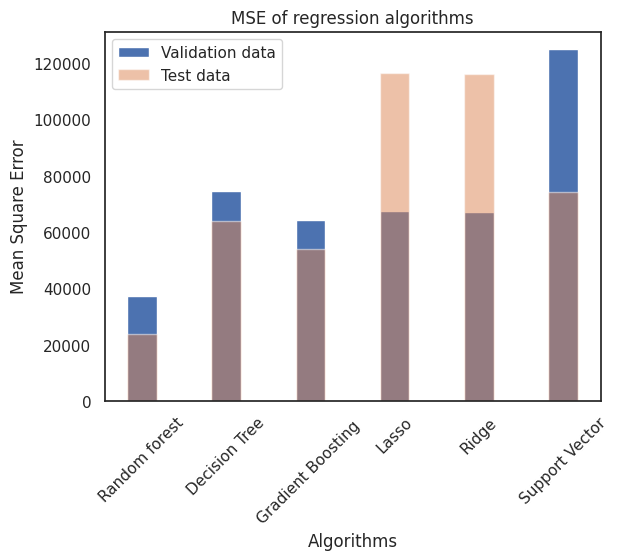

In [ ]:
import matplotlib.pyplot as plt

categories = ['Random forest', 'Decision Tree', 'Gradient Boosting ', 'Lasso', 'Ridge', 'Support Vector']
values1 = [37318.47, 74547.19, 64289.56, 67422.63, 67336.56, 125017.59]
values2 = [24007.63, 64092.39, 53937.34, 116470.82, 116368.10, 74492.72]


fig, ax = plt.subplots()

bar_width = 0.35
index = range(len(categories))
bar1 = ax.bar(index, values1, bar_width, label='Validation data')
bar2 = ax.bar(index, values2, bar_width, label='Test data', alpha=0.5)

ax.set_xlabel('Algorithms')
ax.set_ylabel('Mean Square Error')
ax.set_title('MSE of regression algorithms')
ax.set_xticks(index)
plt.xticks(rotation=45)
ax.set_xticklabels(categories)
ax.legend()
plt.show()

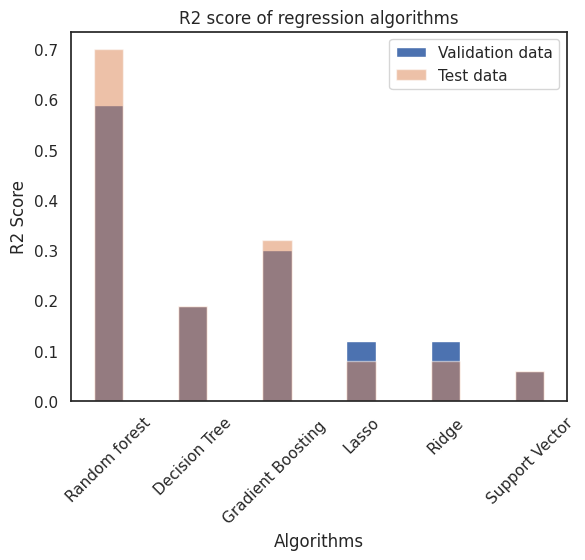

In [ ]:
import matplotlib.pyplot as plt

categories = ['Random forest', 'Decision Tree', 'Gradient Boosting ', 'Lasso', 'Ridge', 'Support Vector']
values1 = [0.59, 0.19, 0.30, 0.12, 0.12, 0.06]
values2 = [0.70, 0.19, 0.32, 0.08, 0.08, 0.06]


fig, ax = plt.subplots()

bar_width = 0.35
index = range(len(categories))
bar1 = ax.bar(index, values1, bar_width, label='Validation data')
bar2 = ax.bar(index, values2, bar_width, label='Test data', alpha=0.5)

ax.set_xlabel('Algorithms')
ax.set_ylabel('R2 Score')
ax.set_title('R2 score of regression algorithms')
ax.set_xticks(index)
plt.xticks(rotation=45)
ax.set_xticklabels(categories)
ax.legend()
plt.show()

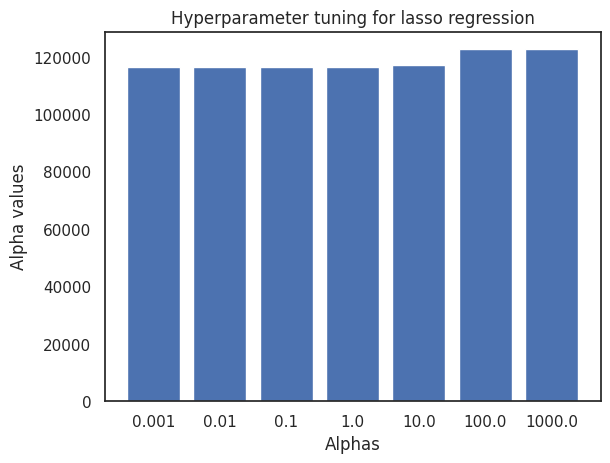

In [ ]:
import matplotlib.pyplot as plt

category = ['0.001', '0.01', '0.1', '1.0', '10.0', '100.0', '1000.0']
alpha_values = [116368.16, 116367.91, 116366.67, 116470.81, 117229.15, 122644.09, 122647.80]
plt.bar(category, alpha_values)

plt.title("Hyperparameter tuning for lasso regression")
plt.xlabel("Alphas")
plt.ylabel("Alpha values")
plt.show()

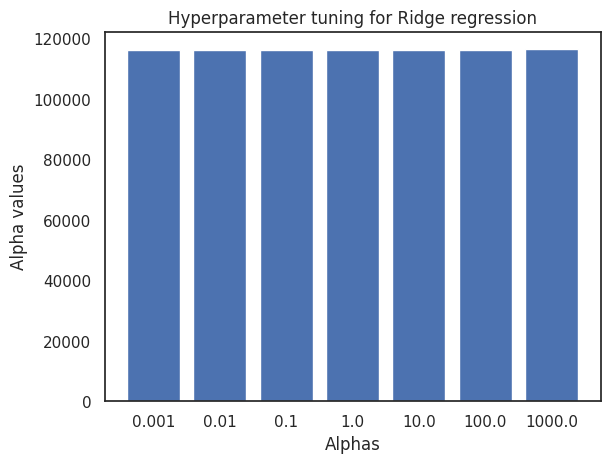

In [ ]:
import matplotlib.pyplot as plt

category = ['0.001', '0.01', '0.1', '1.0', '10.0', '100.0', '1000.0']
alpha_values = [116368.18, 116368.18, 116368.17, 116368.10, 116367.58, 116376.23, 116493.73]

plt.bar(category, alpha_values)

plt.title("Hyperparameter tuning for Ridge regression")
plt.xlabel("Alphas")
plt.ylabel("Alpha values")
plt.show()